In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

sns.set()


In [2]:
def lee_medida_BD(filename, pollo, medida):
    # Devuelve los datos de la tabla correspondientes con el pollo y la medida en formato DataFrame
    try:
        with pd.HDFStore(filename,complib="zlib",complevel=4) as hdf_db:
            p_e  = hdf_db.get('data/pollos_estado')
            t    = hdf_db.get('data/tabla')
            extracto = p_e[(p_e['Pollo']==str(pollo))&(p_e['Medida']==str(medida))]

            if (np.array(extracto).size==0):
                return_value = pd.DataFrame([])
            else:
                Primero = extracto['Primero'].to_numpy(dtype='int')[0]
                Ultimo  = extracto['Ultimo'].to_numpy(dtype='int')[0]
                return_value = t.iloc[Primero:Ultimo+1]
    except EnvironmentError:
        print("Base de Datos no encontrada")
        return_value = -1

    return return_value

In [4]:
data_frame=lee_medida_BD('./test19_7_22.hdf', 1,7) 
print(data_frame)

     Pollo  Medida            Freq         Z_mod    Z_Fase         Err  \
0      1.0     7.0       57.949836  34354.166667 -0.482874  673.744040   
1      1.0     7.0       60.692151  33861.111111 -0.494510  668.395336   
2      1.0     7.0       63.564239  33381.944444 -0.506145  662.586731   
3      1.0     7.0       66.572240  32895.833333 -0.517781  656.755385   
4      1.0     7.0       69.722587  32430.555556 -0.529417  650.370662   
..     ...     ...             ...           ...       ...         ...   
207    1.0     7.0   831148.671147    777.777778 -0.035876    0.154159   
208    1.0     7.0   870480.478745    819.444444  0.009696   -0.037759   
209    1.0     7.0   911673.555143    631.944444 -0.039755    0.191676   
210    1.0     7.0   954815.979727    604.166667  0.205561   -0.989831   
211    1.0     7.0  1000000.000000    659.722222  0.209440   -0.881849   

              Eri         E_mod    E_fase             R           X  
0    79941.645062  79944.484151 -1.562369

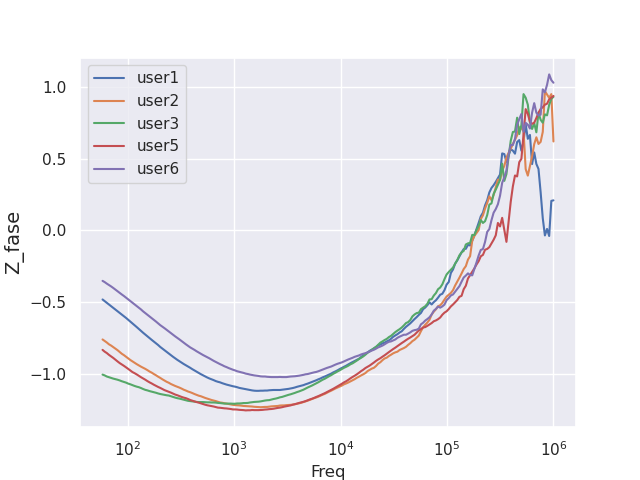

In [5]:
data_frame1=lee_medida_BD('./test19_7_22.hdf', 1,7) 
ax=data_frame1.plot(x ='Freq', y='Z_Fase',logx=True, kind = 'line', label='user1')
data_frame2=lee_medida_BD('./test19_7_22.hdf', 2,7) 
data_frame2.plot(ax=ax,x ='Freq', y='Z_Fase',logx=True, kind = 'line',label='user2')
data_frame3=lee_medida_BD('./test19_7_22.hdf', 3,7) 
data_frame3.plot(ax=ax,x ='Freq', y='Z_Fase',logx=True, kind = 'line',label='user3')
data_frame5=lee_medida_BD('./test19_7_22.hdf', 5,7) 
data_frame5.plot(ax=ax,x ='Freq', y='Z_Fase',logx=True, kind = 'line',label='user5')
data_frame6=lee_medida_BD('./test19_7_22.hdf', 6,7) 
data_frame6.plot(ax=ax,x ='Freq', y='Z_Fase',logx=True, kind = 'line',label='user6')
plt.ylabel('Z_fase', fontsize=14)
plt.show()

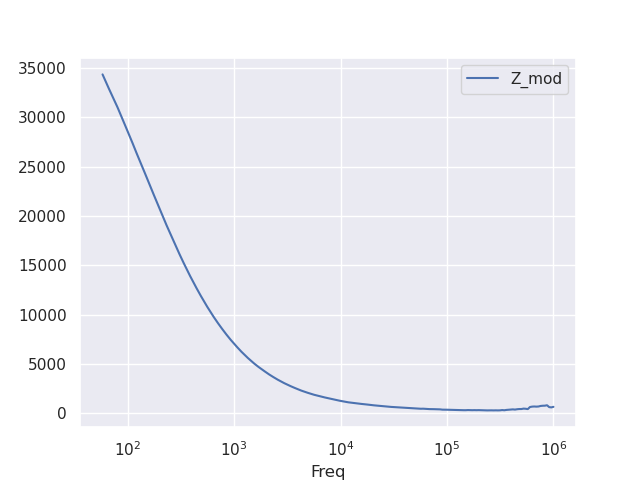

In [5]:
%matplotlib widget
data_frame.plot(x ='Freq', y='Z_mod',logx=True, kind = 'line')
plt.show()

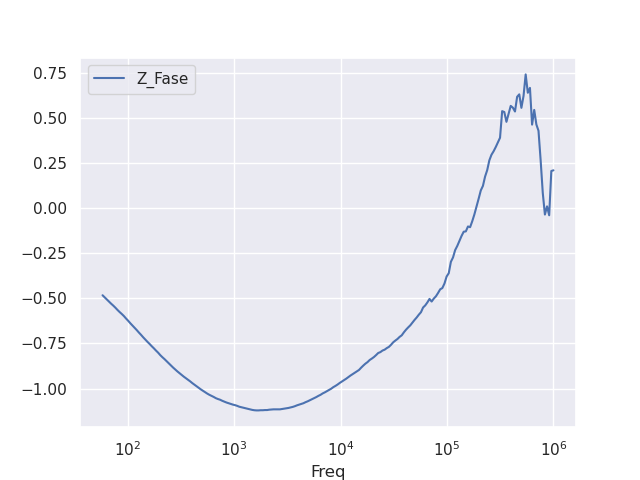

In [6]:
data_frame.plot(x ='Freq', y='Z_Fase',logx=True, kind = 'line')
plt.show()

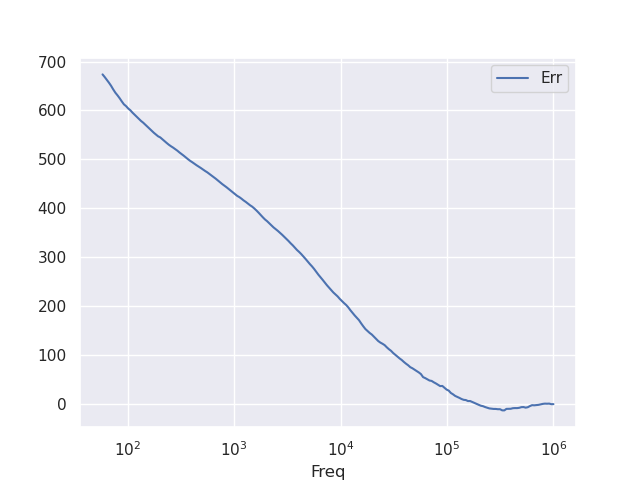

In [7]:
data_frame.plot(x ='Freq', y='Err',logx=True, kind = 'line')
plt.show()

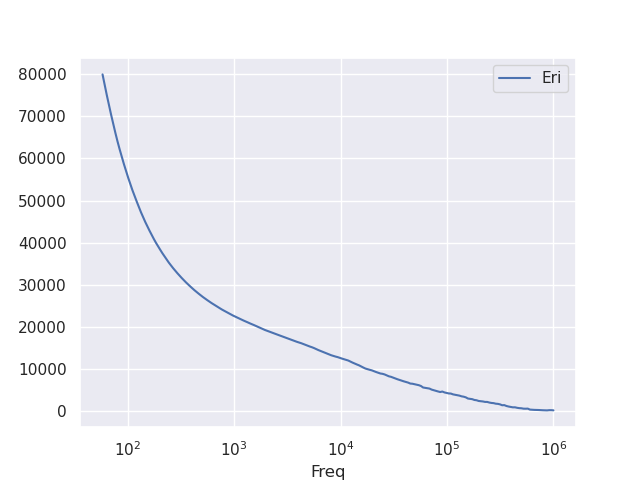

In [8]:
data_frame.plot(x ='Freq', y='Eri',logx=True, kind = 'line')
plt.show()

In [9]:
veamos= pd.HDFStore('./pandas/test19_7_22.hdf',complib="zlib",complevel=4)
t    = veamos.get('data/tabla')
t2 =veamos.get('data/pollos_estado')
print(t)
print (t2)

OSError: ``./pandas`` does not exist

In [ ]:
cond = t['Pollo'] == 5.0
t.loc[cond,'Pollo'] = 4.0
cond = t['Pollo'] == 6.0
t.loc[cond,'Pollo'] = 5.0
cond2 = t2['Pollo'] == 5
t2.loc[cond2,'Pollo'] = 4
cond2 = t2['Pollo'] == 6
t2.loc[cond2,'Pollo'] = 5
print(t)
print(t2)

In [ ]:
cond2 = t2['Pollo'] == str(5)
t2.loc[cond2,'Pollo'] = 4
cond2 = t2['Pollo'] == str(6)
t2.loc[cond2,'Pollo'] = 5
print(t2)